In [3]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

In [4]:
class ComplexExp(object):
    def __init__(self, k, N):
        self.k = k
        self.N = N
        self.n = np.arange(N)
        
        self.exp_kN = np.exp(2j*cmath.pi*self.k*self.n / self.N)
        self.exp_kN *= 1 / (np.sqrt(N))
        
        self.exp_kN_real = self.exp_kN.real
        self.exp_kN_img = self.exp_kN.imag
        

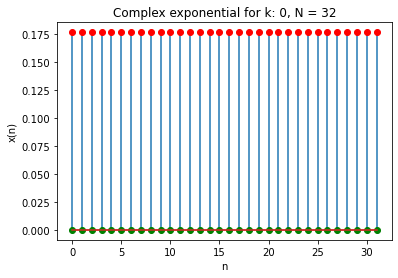

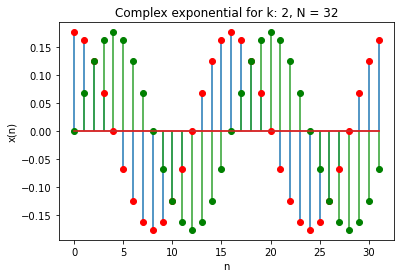

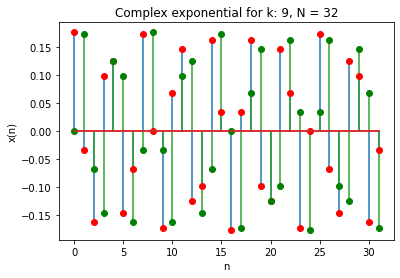

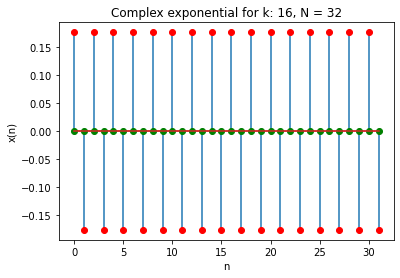

In [5]:
def part_11(N, k_list):

    for k in k_list:
        exp_k = ComplexExp(k, N)
        
        cpx_cos = exp_k.exp_kN_real
        cpx_sin = exp_k.exp_kN_img
        
        cpx_plt = plt.figure()
        plt.title("Complex exponential for k: " + str(k) + ", N = 32")
        plt.stem(exp_k.n, cpx_cos, 'tab:blue', markerfmt='ro')
        plt.stem(exp_k.n, cpx_sin, 'tab:green', markerfmt='go')
        plt.xlabel("n")
        plt.ylabel("x(n)")
        plt.savefig('Q11, Figure ' + str(k))

if __name__ == '__main__':
    list_of_ks = [0, 2, 9, 16]
    duration_of_signal = 32
    part_11(duration_of_signal, list_of_ks)

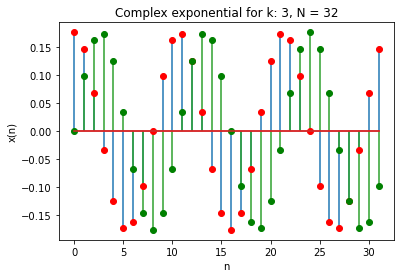

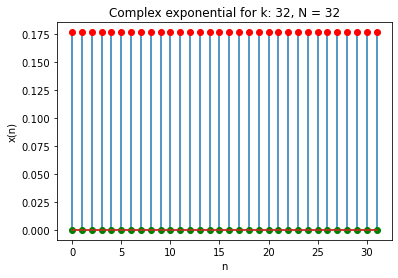

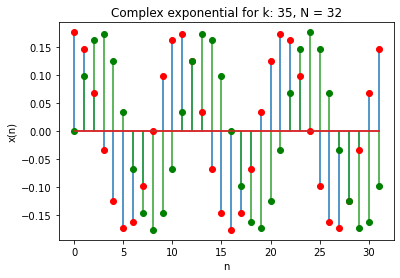

In [6]:
def part_12(k_list, N):
    for i in k_list:
        comp_eq = ComplexExp(i, N)
        real_part = comp_eq.exp_kN_real
        img_part = comp_eq.exp_kN_img
        
        cpx_plt = plt.figure()
        plt.title("Complex exponential for k: " + str(i) + ", N = 32")
        plt.stem(comp_eq.n, real_part, 'tab:blue', markerfmt='ro')
        plt.stem(comp_eq.n, img_part, 'tab:green', markerfmt='go')
        plt.xlabel("n")
        plt.ylabel("x(n)")
        plt.savefig('Q12, Figure ' + str(i))
        
if __name__ == '__main__':
    list_of_ks = [3, 32, 35]
    duration_of_signal = 32
    part_12(list_of_ks, duration_of_signal)

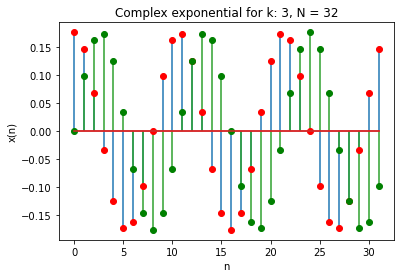

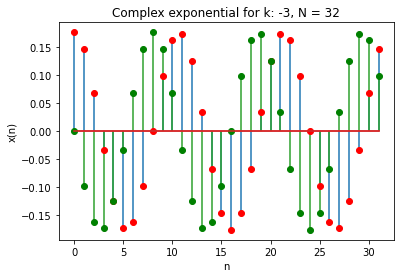

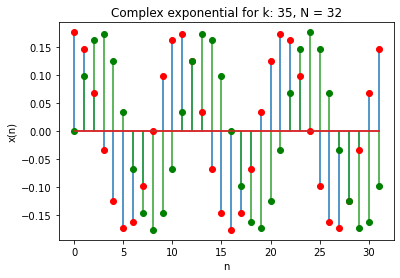

In [7]:
def part_13(k_list, N):
    for i in k_list:
        comp_eq = ComplexExp(i, N)
        real_part = comp_eq.exp_kN_real
        img_part = comp_eq.exp_kN_img
        
        cpx_plt = plt.figure()
        plt.title("Complex exponential for k: " + str(i) + ", N = 32")
        plt.stem(comp_eq.n, real_part, 'tab:blue', markerfmt='ro')
        plt.stem(comp_eq.n, img_part, 'tab:green', markerfmt='go')
        plt.xlabel("n")
        plt.ylabel("x(n)")
        plt.savefig('Q12, Figure ' + str(i))
        
if __name__ == '__main__':
    list_of_ks = [3, -3, 35]
    duration_of_signal = 32
    part_12(list_of_ks, duration_of_signal)

Part 1.4



 Matrix of inner products: Mp


/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5213/4103128172.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  comp_eq = np.zeros((N,N), dtype=np.complex)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5213/4103128172.py:27: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  opt2 = np.zeros((N,N), 

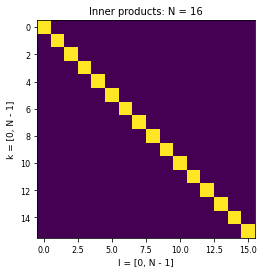

In [8]:

def part_15(N):
    
    k_list = np.arange(N)
    l_list = np.arange(N)

    comp_eq = np.zeros((N,N), dtype=np.complex)
    for k in k_list:
        comp_eqeq = ComplexExp(k, N)
        comp_eq[:, k] = comp_eqeq.exp_kN

    # Conjugate
    comp_eq_conj = np.conjugate(comp_eq)

    
    res = np.round(np.matmul(comp_eq_conj, comp_eq).real)
    print ("\n Matrix of inner products: Mp")
    fig, ax = plt.subplots()
    im = ax.imshow(res)
    plt.title('Inner products: N = ' + str(N), fontsize=10)
    plt.xlabel('l = [0, N - 1]', fontsize=9)
    plt.ylabel('k = [0, N - 1]', fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    
    # Option 2: using for loops
    opt2 = np.zeros((N,N), dtype=np.complex)
    for k in k_list:
        for l in l_list:
            r = np.dot(comp_eq_conj[:, k], comp_eq[:, l])
            opt2[k, l] = r
            opt2[l, k] = r
    
    res2 = opt2.real 

    return res

if __name__ == '__main__':
    duration_of_signal = 16
    part_15(duration_of_signal)

In [41]:
def sound(f, T, fs):

    if fs < 0:
        fs = - fs
    
    if f < 0:
        f = -f

    # Duration of the discrete signal
    N = math.floor(T * fs)
    # Discrete frequency
    k = N * f / fs
    # Complex exponential
    comp_eq = ComplexExp(k, N)
    x = comp_eq.exp_kN
    x = np.sqrt(N) * x

    return x, N

def part_31(f, T, fs):
    
    comp_eq, num_samples = sound(f, T, fs)
    real_part = comp_eq.real

In [45]:
from scipy.io.wavfile import write
def part_32(f0, T, fs):
    
    comp_eq, num_samples = sound(f0, T, fs)
    a_note = comp_eq.real
    write("Anote.wav", fs, a_note.astype(np.float32))

part_32(440, 2, 44100)

In [46]:
def part_33(note, T, fs):

    fi = 2**((note - 49) / 12)*440
    comp_eq, num_samples = sound(fi, T, fs)
    p33note = comp_eq.real
    write("p33note.wav", fs, p33note.astype(np.float32))

    
def p_33_notename(note, T, fs):
    # mapping notes
    note_dict = ['C4', 'D4', 'D4s', 'E4', 'F4', 'G4', 'A4', 'A4s', 'B4', 'C5', 'D5', 'D5s', 'E5', 'F5', 'G5',
    'A5', 'A5s', 'B5', 'C6', 'C6s', 'D6', 'E6', 'F6', 'F6s', 'G6', 'A6', 'B6']

    note_fis = [40, 42, 43,
    44, 45, 47, 49,
    50, 51, 52, 54,
    55, 56, 57, 59,
    61, 62, 63, 64,
    65, 66, 68, 69,
    70, 71, 73, 75]

    idx = note_dict.index(note)
    fi = note_fis[idx]

    # Retrieves complex exponential
    comp_eq, num_samples = sound(fi, T, fs)
    p33note = comp_eq.real
    
    file_name = str(note) + 'note.wav'
    write(file_name, fs, p33note.astype(np.float32))

In [54]:
def part_34(list_notes, list_times, fs):
    song = []
    for note, note_time in zip(list_notes, list_times):
        fi = 2**((note - 49) / 12)*440
        x, N = sound(fi, note_time, fs)
        song = np.append(song, x.real)
        song = np.append(song, np.zeros(10))

    write("p34_song.wav", fs, song.astype(np.float32))
    
C4=40
D4=42
D4s=43
E4=44
F4=45
G4=47
A4=49
A4s=50
B4=51
C5=52
D5=54
D5s=55
E5=56
F5=57
G5=59
A5=61
A5s=62
B5=63
C6=64
C6s=65
D6=66
E6=68
F6=69
F6s=70
G6=71
A6=73
B6=75
song_notes = [D6, G5, A5, B5, C6, D6, G5, G5, E6, C6, D6, E6, F6s, G6, G5, G5, C6, D6, C6, B5, A5, B5, C6, B5, A5, G5, F5, G5, A5, B5, G5, B5, A5,
                D6, G5, A5, B5, C6, D6, G5, G5, E6, C6, D6, E6, F6s, G6, G5, G5,
                C6, D6, C6, B5, A5, B5, C6, B5, A5, G5, A5, B5, A5, G5, F5, G5,
                B6, G6, A6, B6, G6, A6, D6, E6, F6s, D6, G6, E6, F6s, G6, D6, C6s, B5, C6, A5,
                A5, B5, C6s, D6, E6, F6, G6, F6, E6, F6, A5, C6s, D6,
                D6, G5, F5, G5, E6, G5, F5, G5, D6, C6, B5, A5, G6, F5, G5, A5,
                D5, E5, F5, G5, A5, B5, C6, B5, A5, B5, D6, G5, F5, G5]
rhythm=0.5
b = 1*rhythm
w = 2*rhythm
h = 0.5*rhythm
dw = 3*rhythm
    
song_times = [b, h, h, h, h, b, b, b, b, h, h, h, h, b, b, b,
                b, h, h, h, h, b, h, h, h, h, b, h, h, h, h, b, w,
                b, h, h, h, h, b, b, b, b, h, h, h, h, b, b, b,
                b, h, h, h, h, b, h, h, h, h, b, h, h, h, h, dw,
                b, h, h, h, h, b, h, h, h, h, b, h, h, h, h, b, h, h, b,
                h, h, h, h, h, h, b, b, b, b, b, b, dw,
                b, h, h, b, b, h, h, b, b, b, b, h, h, h, h, b,
                h, h, h, h, h, h, b, b, b, h, h, b, b, dw]
    

part_34(song_notes, song_times, 44100)